In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

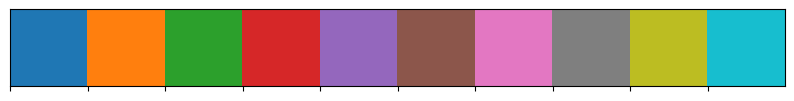

In [2]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

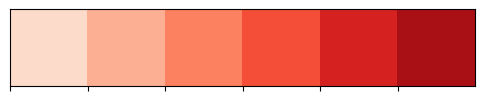

In [10]:
sns.palplot(sns.color_palette("Reds"))

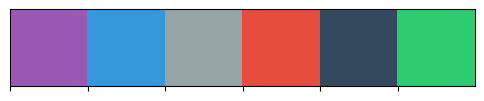

In [11]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

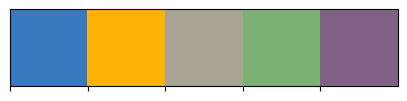

In [12]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

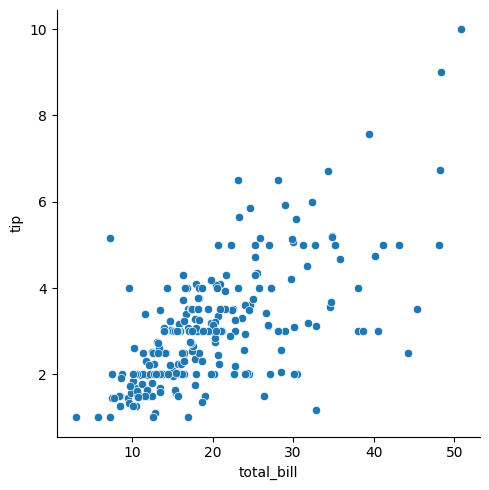

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [16]:
# 두 변수 사이의 관계 표현
tips = sns.load_dataset("tips")
tips
sns.relplot(x="total_bill", y="tip", data=tips)
plt.show()
tips[["total_bill", "tip"]].corr()

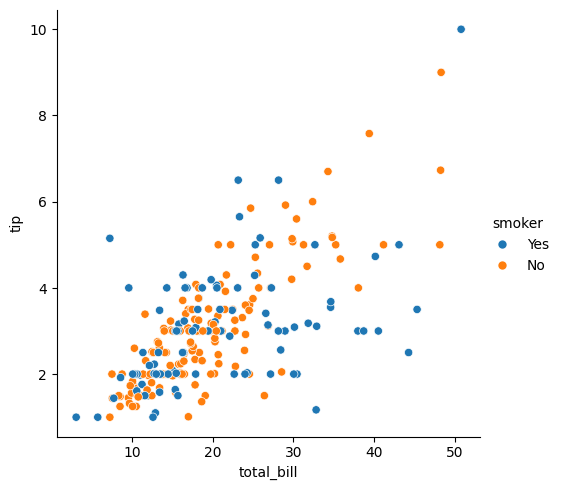

            total_bill       tip
total_bill    1.000000  0.488218
tip           0.488218  1.000000
            total_bill       tip
total_bill    1.000000  0.822183
tip           0.822183  1.000000


In [23]:
# 범주형 변수와 시각화 특성 바인딩
# sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
# sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
plt.show()

print( tips[tips["smoker"] == "Yes"][["total_bill", "tip"]].corr() )
print( tips[tips["smoker"] == "No"][["total_bill", "tip"]].corr() )